In [1]:
# Import Dependendies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import csvs
defensive = pd.read_csv("../Resources/clean_defensive.csv")
kickers = pd.read_csv("../Resources/clean_field_goal_kickers.csv")
fumbles = pd.read_csv("../Resources/clean_fumbles.csv")
passing = pd.read_csv("../Resources/clean_passing.csv")
receiving = pd.read_csv("../Resources/clean_receiving.csv")
rushing = pd.read_csv("../Resources/clean_rushing.csv")

In [3]:
# Files to be merged
files = [kickers, fumbles, passing, receiving, rushing]

In [4]:
# Merge dataframes
df = defensive
for i in range(5):
    df = pd.merge(df, files[i])

In [5]:
# Visualize df
df.head()

,team_year,total_tackles_def,solo_tackles_def,assisted_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,ints_for_tds_def,int_yards_def,...,receptions_rec,receiving_yards_rec,receiving_tds_rec,first_down_receptions_rec,fumbles_rec,rushing_attempts_rush,rushing_yards_rush,rushing_tds_rush,rushing_first_downs_rush,fumbles_rush
0,arizona_cardinals_1994,0,0,0,9,0,0,1,1,59,...,133,1212,4,65,2,140,413,6,26,7
1,arizona_cardinals_1995,0,0,0,3,0,0,3,0,42,...,225,2647,11,121,2,83,264,2,11,2
2,arizona_cardinals_1996,0,0,0,2,0,0,3,0,23,...,243,2459,14,140,3,276,1099,6,48,7
3,arizona_cardinals_1997,0,0,0,12,0,0,3,0,15,...,182,1938,10,95,4,133,385,2,24,2
4,arizona_cardinals_1998,0,0,0,10,0,0,10,0,80,...,182,1997,6,92,4,124,366,6,30,2


In [6]:
# Descriptive statistics: Great percentage of variables are 0's
for col in df.loc[:, df.columns != "team_year"]:
    print(col)
    print(df[col].describe())
    print(" ")

total_tackles_def
count     798.000000
mean      347.320802
std       363.545554
min         0.000000
25%         0.000000
50%       353.500000
75%       671.750000
max      1083.000000
Name: total_tackles_def, dtype: float64
 
solo_tackles_def
count    798.000000
mean     261.383459
std      270.329737
min        0.000000
25%        0.000000
50%      282.000000
75%      499.250000
max      803.000000
Name: solo_tackles_def, dtype: float64
 
assisted_tackles_def
count    798.000000
mean      85.937343
std       99.313407
min        0.000000
25%        0.000000
50%       62.000000
75%      150.750000
max      438.000000
Name: assisted_tackles_def, dtype: float64
 
sacks_def
count    798.000000
mean      16.809524
std        8.112528
min        0.000000
25%       11.000000
50%       16.000000
75%       22.000000
max       45.000000
Name: sacks_def, dtype: float64
 
safties_def
count    798.000000
mean       0.203008
std        0.446811
min        0.000000
25%        0.000000
50%        0

In [7]:
# Since 0's are probably related to year of measurement, we'll need a dataset by year to evaluate
# Create "year" column
df_var_check = df
df_var_check["year"] = [int(row[-4:]) for row in df_var_check["team_year"]]

# Drop "team_year"
df_var_check = df_var_check.drop("team_year", axis = 1)

In [8]:
# Group by year
df_var_check_year = df_var_check.groupby("year").sum()

In [9]:
# We can see many variables with 0's
df_var_check_year.head(10)

,total_tackles_def,solo_tackles_def,assisted_tackles_def,sacks_def,safties_def,passes_defended_def,ints_def,ints_for_tds_def,int_yards_def,kicks_blocked_kick,...,receptions_rec,receiving_yards_rec,receiving_tds_rec,first_down_receptions_rec,fumbles_rec,rushing_attempts_rush,rushing_yards_rush,rushing_tds_rush,rushing_first_downs_rush,fumbles_rush
year,,,,,,,,,,,,,,,,,,,,,
1977,0,0,0,0,0,0,5,0,39,0,...,247,3361,18,0,0,745,3505,23,0,0
1978,0,0,0,0,0,0,4,0,77,0,...,270,3363,10,0,0,740,2954,19,0,0
1979,0,0,0,0,0,0,7,0,63,0,...,286,3173,15,0,0,666,2595,21,0,0
1980,0,0,0,0,0,0,6,0,67,0,...,262,3388,18,0,0,600,2576,23,0,0
1981,0,0,0,0,1,0,30,6,670,0,...,510,7001,41,0,0,614,2404,15,0,0
1982,0,0,0,76,2,0,27,4,397,0,...,582,7330,39,0,0,652,2469,21,0,0
1983,0,0,0,231,5,0,100,9,1496,0,...,1950,24229,153,0,0,3668,15902,101,0,0
1984,0,0,0,259,2,0,107,10,1306,0,...,2158,26390,185,0,0,4015,17373,135,0,0
1985,0,0,0,310,2,0,150,12,1820,0,...,2729,34641,217,0,0,4551,18938,147,0,0


total_tackles_def


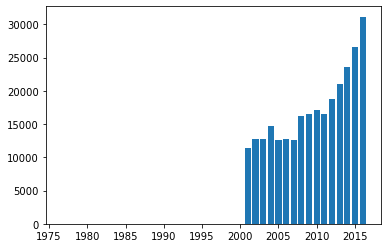

 
solo_tackles_def


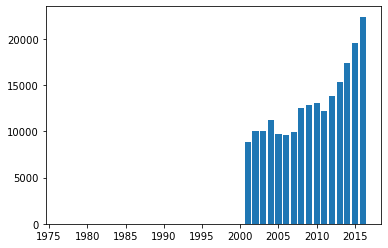

 
assisted_tackles_def


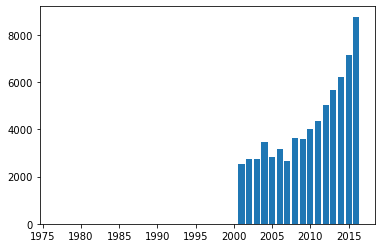

 
sacks_def


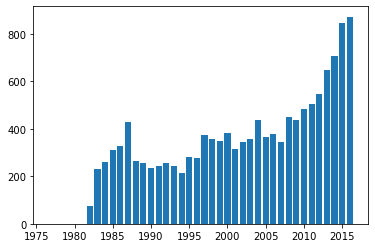

 
safties_def


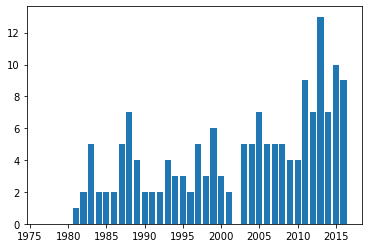

 
passes_defended_def


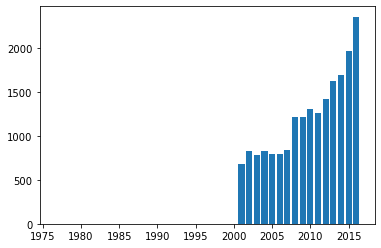

 
ints_def


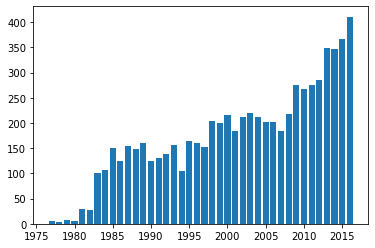

 
ints_for_tds_def


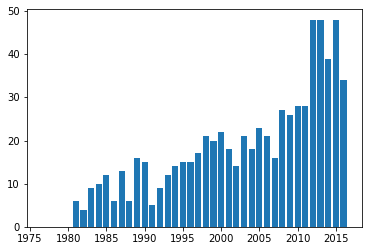

 
int_yards_def


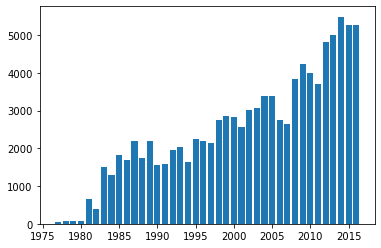

 
kicks_blocked_kick


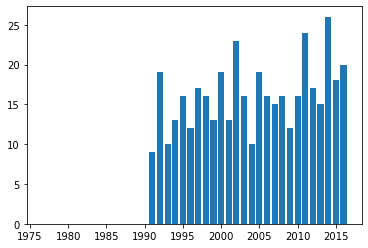

 
fgs_made_kick


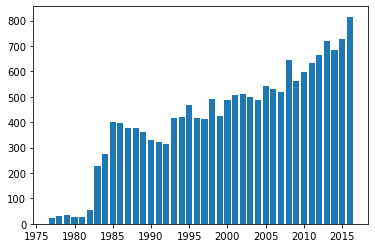

 
fgs_attempted_kick


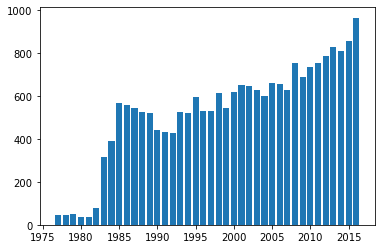

 
extra_points_attempted_kick


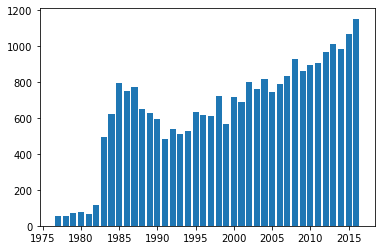

 
extra_points_made_kick


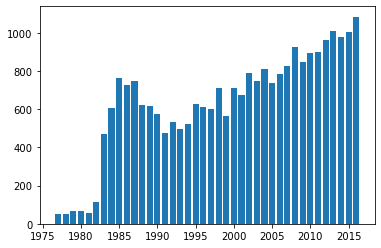

 
extra_points_blocked_kick


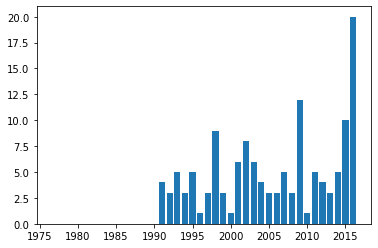

 
fumbles_lost_fum


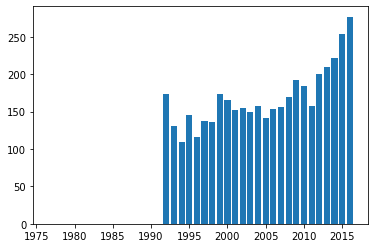

 
forced_fumbles_fum


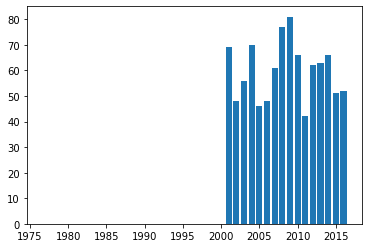

 
own_fumble_return_yards_fum


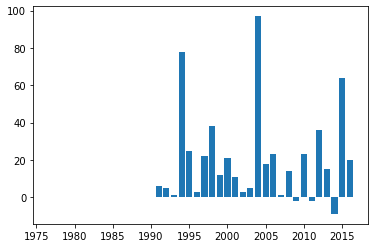

 
opponent_fumble_return_yards_fum


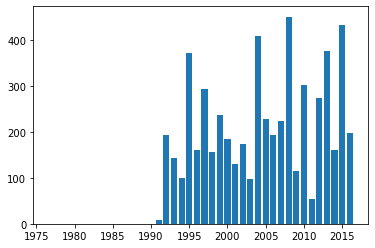

 
fumble_return_tds_fum


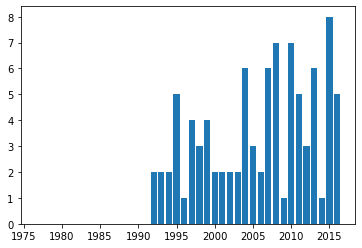

 
passes_attempted_pass


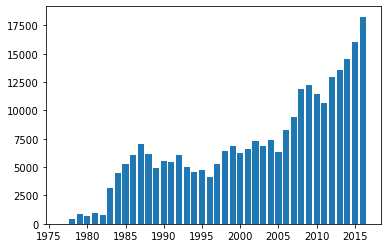

 
passes_completed_pass


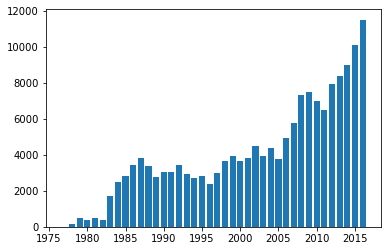

 
passing_yards_pass


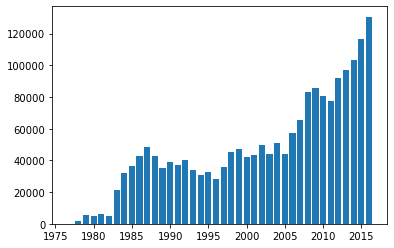

 
td_passes_pass


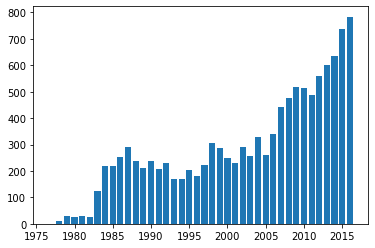

 
ints_pass


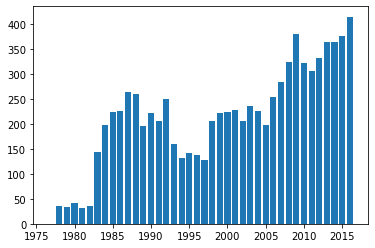

 
sacks_pass


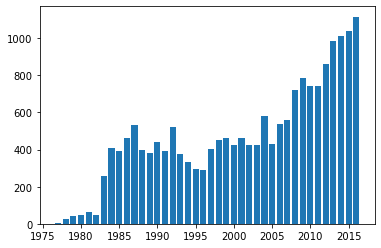

 
sacked_yards_lost_pass


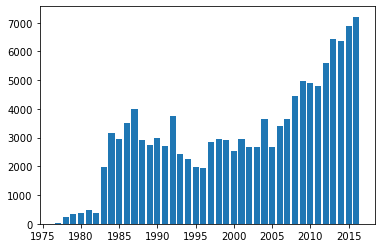

 
receptions_rec


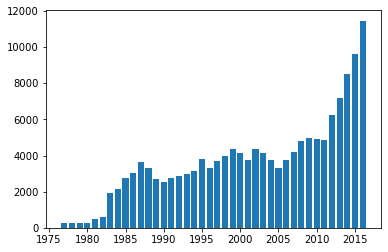

 
receiving_yards_rec


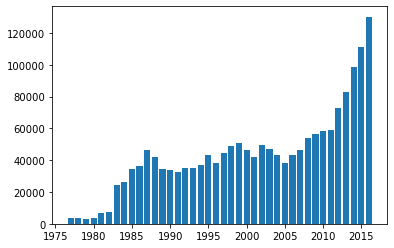

 
receiving_tds_rec


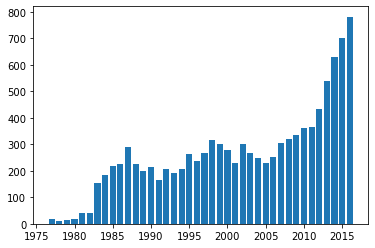

 
first_down_receptions_rec


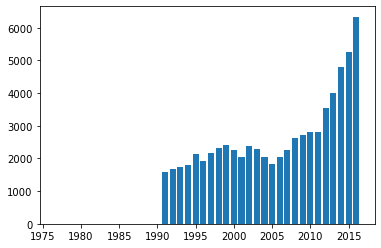

 
fumbles_rec


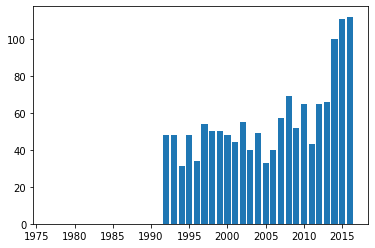

 
rushing_attempts_rush


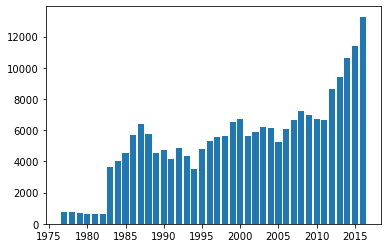

 
rushing_yards_rush


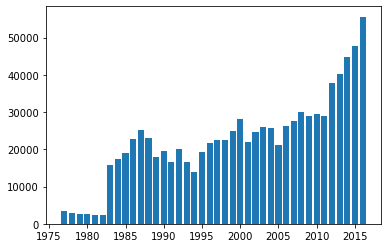

 
rushing_tds_rush


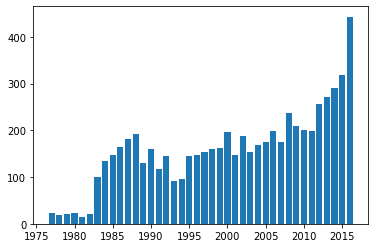

 
rushing_first_downs_rush


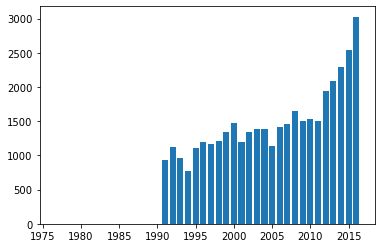

 
fumbles_rush


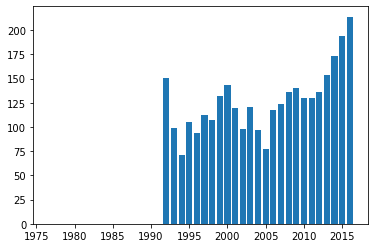

In [10]:
# Plot variables to check for empty years
for var in df_var_check_year.columns:
    plt.figure()
    print(var)
    plt.bar(df_var_check_year.index, height = df_var_check_year[var])
    plt.show()
    plt.close()
    print(" ")